# Relation between Poisson and $\chi^{2}$ distributions

**References:**
- [Norman L. Johnson Adrienne W. Kemp Samuel Kotz: Univariate Discrete Distributions](dx.doi.org/10.1002/0471715816)
    - Section 4.5 Approximations, bounds, and transformation
    - Section 4.12.2 Gamma Distribution
- [Statsdirect: Poisson Rate Confidence Interval](https://www.statsdirect.com/help/rates/poisson_rate_confidence_interval.htm)

\begin{equation}
\begin{aligned}
    X &\sim Poi(\lambda)\\
    Y &\sim \chi^{2}\left(df=2 (\nu+1) \right)
\end{aligned}
\end{equation}

\begin{equation}
    Pr\left[X \leq \nu \right]
    =
    Pr\left[Y \geq 2 \lambda \right]
\end{equation}

\begin{equation}
    CDF_{Poi(\lambda)}\left( \nu \right)
    =
    1 - CDF_{\chi^{2}(df=2 (\nu+1))} \left( 2\lambda \right)
\end{equation}

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nu = 10

In [3]:
lambdas = np.linspace(0.01, 30.01, 100)
df = 2*(nu+1)

In [4]:
poisson_cdfs = scipy.stats.poisson.cdf(nu, mu=lambdas)
chi2_sfs = scipy.stats.chi2.sf(2*lambdas, df=df)
diff = poisson_cdfs - chi2_sfs

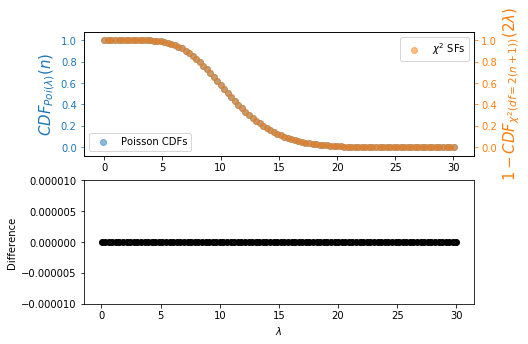

In [5]:
fig, axes = plt.subplots(figsize=(7,5), nrows=2)
ax1a = axes[0]
ax2 = axes[1]
ax1b = ax1a.twinx()
ax1a.scatter(lambdas, poisson_cdfs, c='C0', alpha=0.5, label='Poisson CDFs')
ax1b.scatter(lambdas, chi2_sfs, c='C1', alpha=0.5, label=r'$\chi^{2}$ SFs')
ax1a.set_ylabel(r"$CDF_{Poi(\lambda)}(n)$", fontsize=15, color='C0')
ax1b.set_ylabel(r"$1- CDF_{\chi^{2}(df=2 (n+1))}(2\lambda)$", fontsize=15, color='C1')
ax1a.tick_params('y', colors='C0')
ax1b.tick_params('y', colors='C1')
ax2.scatter(lambdas, diff, c= 'k')
ax2.set_ylabel('Difference')
ax2.set_xlabel("$\lambda$")
ax2.set_ylim(-1e-5, 1e-5)
ax1a.legend(loc='lower left')
ax1b.legend(loc='upper right')